In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the loan data
loan_data = pd.read_csv('loan.csv');
loan_data.head()

C:\Users\rawoof\AppData\Local\Temp\ipykernel_13000\3614355125.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('loan.csv');


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Using low_memory=False for above warning
loan_data = pd.read_csv('loan.csv', low_memory=False);
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
# Understanding the number of rows and columns
loan_data.shape

# Rows -- 39717 and Columns -- 111

(39717, 111)

In [6]:
# Missing value check
loan_data.isna().sum()

# Most of the columns have null value == total no. of rows . Meaning entire column is null

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
# Percentage of data that is missing
100*loan_data.isna().mean()

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [8]:
# Taking care of missing values
# Any col with >40% of missing values should not be ideally considered as a part of the analysis

missing_percentage = 100*loan_data.isna().mean()
cols_to_drop = missing_percentage[missing_percentage > 40].index

# List of columns having missing values more than 40%
cols_to_drop

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [9]:
# Number of columns with missing values more than 40%
cols_to_drop.size

57

In [10]:
# Dropping these columns 
loan_data = loan_data.drop(columns=cols_to_drop)

In [11]:
loan_data.shape

# After dropping the above columns , updated data has 39717 rows and 54 columns

(39717, 54)

In [12]:
# Missing value check
loan_data.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [13]:
# Dropping more columns that is not needed
loan_data = loan_data.drop(columns=['id','member_id','emp_title','url','desc','inq_last_6mths','pub_rec','pub_rec_bankruptcies'])

In [14]:
loan_data.shape

(39717, 46)

In [15]:
# Check for tax_liens
loan_data['tax_liens'].value_counts()

tax_liens
0.0    39678
Name: count, dtype: int64

In [16]:
# Dropping tax_liens column as 39678 values out of 39717 are 0.0 and rest are NaN
loan_data = loan_data.drop(columns=['tax_liens'])
loan_data.shape

(39717, 45)

In [17]:
# Check for title and purpose columns
loan_data['title'].value_counts()

title
Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: count, Length: 19615, dtype: int64

In [18]:
loan_data['purpose'].value_counts()

purpose
debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: count, dtype: int64

In [19]:
# 'purpose' column can give more meaningfull insight than the title hence dropping the title column
loan_data = loan_data.drop(columns=['title'])

In [20]:
# Columns left and their null count
loan_data.isna().sum()

loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
purpose                          0
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
open_acc                         0
revol_bal                        0
revol_util                      50
total_acc                        0
initial_list_status              0
out_prncp                        0
out_prncp_inv                    0
total_pymnt         

In [21]:
# 'application_type' has only value, hence dropping the col
loan_data['application_type'].value_counts()

application_type
INDIVIDUAL    39717
Name: count, dtype: int64

In [22]:
# 'policy_code' code too has only value, hence dropping the col
loan_data['policy_code'].value_counts()

policy_code
1    39717
Name: count, dtype: int64

In [23]:
# 'collections_12_mths_ex_med' has only one value 0.0 , hence this col wont be useful
loan_data['collections_12_mths_ex_med'].value_counts()

collections_12_mths_ex_med
0.0    39661
Name: count, dtype: int64

In [24]:
# Dropping more columns that wont be of any use 
loan_data = loan_data.drop(columns=['emp_length','pymnt_plan','zip_code','last_credit_pull_d','out_prncp','initial_list_status','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','application_type','policy_code','collections_12_mths_ex_med','last_credit_pull_d'])

In [25]:
loan_data.shape

(39717, 32)

In [26]:
# Columns left and their null count
loan_data.isna().sum()

loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
open_acc                    0
revol_bal                   0
revol_util                 50
total_acc                   0
out_prncp_inv               0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_int               0
total_rec_late_fee          0
recoveries                  0
collection_recovery_fee     0
last_pymnt_d               71
last_pymnt_amnt             0
dtype: int64

In [27]:
# Dropping more columns that wont be of any use 
loan_data = loan_data.drop(columns=['recoveries','collection_recovery_fee'])

In [28]:
loan_data.shape

(39717, 30)

In [29]:
# Columns left and their null count
loan_data.isna().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
open_acc                0
revol_bal               0
revol_util             50
total_acc               0
out_prncp_inv           0
total_pymnt             0
total_pymnt_inv         0
total_rec_prncp         0
total_rec_int           0
total_rec_late_fee      0
last_pymnt_d           71
last_pymnt_amnt         0
dtype: int64

In [30]:
# ---------------------------------Handling of missing values-------------------------------------
# For 'revol_util' column

loan_data['revol_util'].value_counts()

revol_util
0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: count, Length: 1089, dtype: int64

In [31]:
# Correcting the type of data as it has '%''
loan_data['revol_util'] = loan_data['revol_util'].str.rstrip('%').astype('float')/100

In [32]:
loan_data['revol_util'].value_counts()

revol_util
0.0000    977
0.0020     63
0.6300     62
0.4070     58
0.6670     58
         ... 
0.2574      1
0.4736      1
0.2465      1
0.1061      1
0.0728      1
Name: count, Length: 1089, dtype: int64

In [33]:
# Getting the statistical info about the column
loan_data['revol_util'].describe()

count    39667.000000
mean         0.488322
std          0.283326
min          0.000000
25%          0.254000
50%          0.493000
75%          0.724000
max          0.999000
Name: revol_util, dtype: float64

In [34]:
# Imputing the missing values with the mean
loan_data['revol_util'] = loan_data['revol_util'].fillna(loan_data['revol_util'].mean())

In [35]:
# Checking the null value count
loan_data['revol_util'].isna().sum()

0

In [36]:
# Now , dropping the 'last_pymnt_d' column
loan_data = loan_data.drop(columns='last_pymnt_d')

In [37]:
loan_data.isna().sum()


loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
open_acc               0
revol_bal              0
revol_util             0
total_acc              0
out_prncp_inv          0
total_pymnt            0
total_pymnt_inv        0
total_rec_prncp        0
total_rec_int          0
total_rec_late_fee     0
last_pymnt_amnt        0
dtype: int64

In [38]:
# -------------Checking data for categorical variables--------------
# For 'grade' column
loan_data['grade'].value_counts()

grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: count, dtype: int64

In [39]:
# For 'sub_grade' column
loan_data['sub_grade'].value_counts()

sub_grade
B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: count, dtype: int64

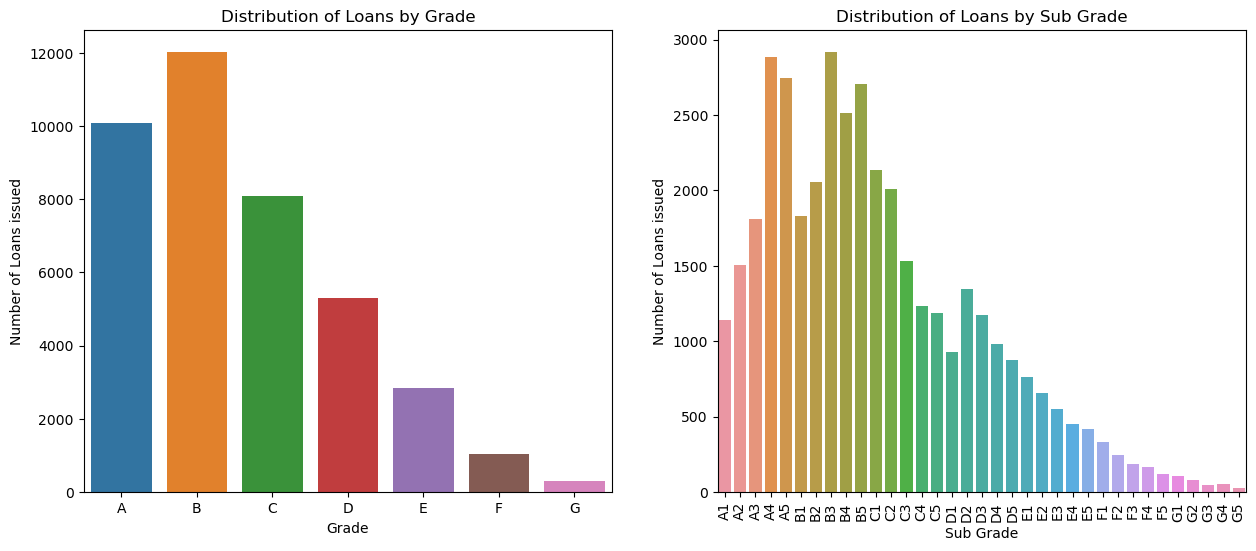

In [40]:
# Plotting graph by grade and sub_grades
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot( x="grade", data=loan_data,order = np.sort(loan_data['grade'].unique()))
plt.title("Distribution of Loans by Grade")
plt.xlabel("Grade")
plt.ylabel("Number of Loans issued")

plt.subplot(1,2,2)
sns.countplot( x="sub_grade", data=loan_data, order = np.sort(loan_data['sub_grade'].unique()))
plt.title("Distribution of Loans by Sub Grade")
plt.xlabel("Sub Grade")
plt.ylabel("Number of Loans issued")

# To rotate axis text
plt.xticks(rotation=90)
plt.show()

In [43]:
# Conclusion from above graphs
# 1. More loans are disbursed to people with grades A and B and least number of loans were given to grades F and G
# 2. From grades A and B , precisely the sub-grades A4 , B3 , A5 and B5 were disbursed with more loans.

In [41]:
# For 'home_ownership' column
loan_data['home_ownership'].value_counts()

home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: count, dtype: int64

In [42]:
# Since 'home_ownership' cannot be NONE , hence replacing the 3 entries for NONE with RENT since it is the mode
loan_data['home_ownership'] = loan_data['home_ownership'].replace('NONE','RENT')

In [43]:
loan_data['home_ownership'].value_counts()

home_ownership
RENT        18902
MORTGAGE    17659
OWN          3058
OTHER          98
Name: count, dtype: int64

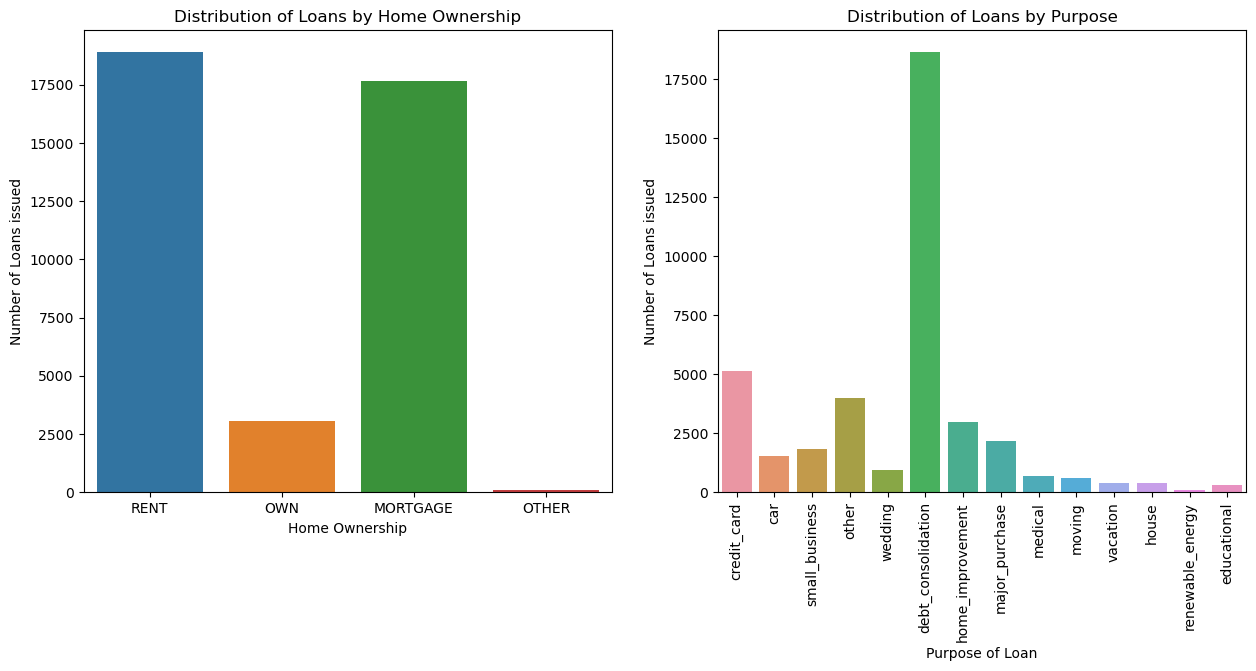

In [44]:
# Plotting the graph by 'home_ownership' and 'purpose'
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot( x="home_ownership", data=loan_data)
plt.title("Distribution of Loans by Home Ownership")
plt.xlabel("Home Ownership")
plt.ylabel("Number of Loans issued")

plt.subplot(1,2,2)
sns.countplot( x="purpose", data=loan_data)
plt.title("Distribution of Loans by Purpose")
plt.xlabel("Purpose of Loan")
plt.ylabel("Number of Loans issued")

# To rotate axis text
plt.xticks(rotation=90)
plt.show()

In [48]:
# Conclusion from above graphs
# 1. More loans are disbursed to/taken by people staying on rent or mortgage.
# 2. This can be due to people taking house loans , educational loans , car loans or personal loans.
# 3. Main purpose of loan is debt consolidation and paying credit cards bills

In [45]:
# For 'verification_status' column
loan_data['verification_status'].value_counts()

verification_status
Not Verified       16921
Verified           12809
Source Verified     9987
Name: count, dtype: int64

In [46]:
# For 'loan_status' column
loan_data['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [47]:
# Removing the data with loan status as 'Current'
loan_data = loan_data[loan_data['loan_status']!='Current']

In [48]:
loan_data.shape

(38577, 29)

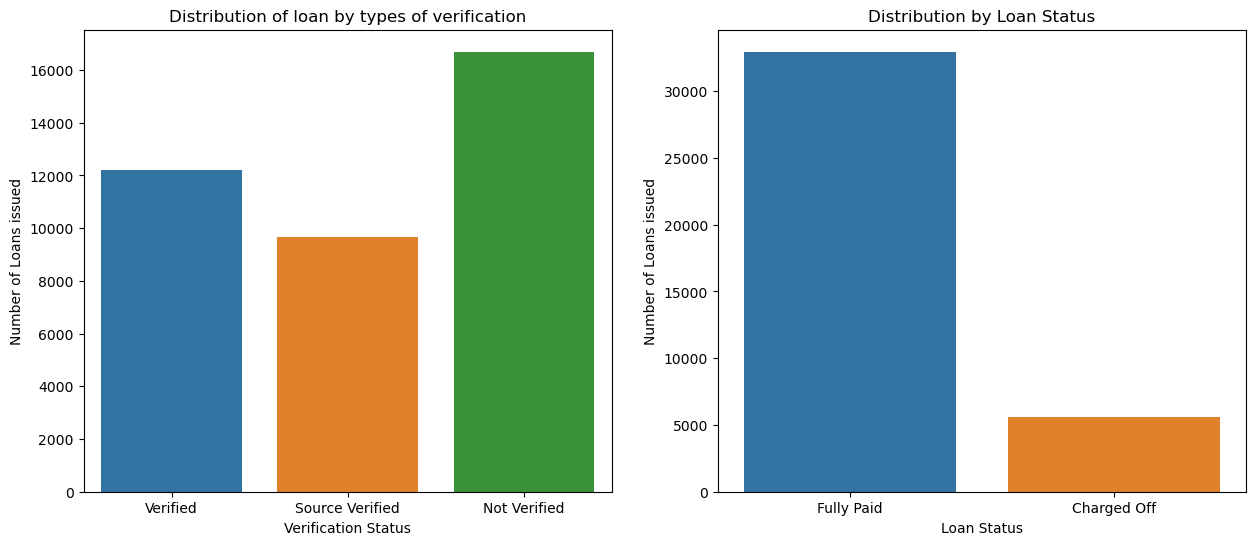

In [49]:
# Plotting the graph by 'verification_status' and 'loan_status'
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot( x="verification_status", data=loan_data)
plt.title("Distribution of loan by types of verification")
plt.xlabel("Verification Status")
plt.ylabel("Number of Loans issued")

plt.subplot(1,2,2)
sns.countplot( x="loan_status", data=loan_data)
plt.title("Distribution by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Number of Loans issued")

# To rotate axis text
plt.show()

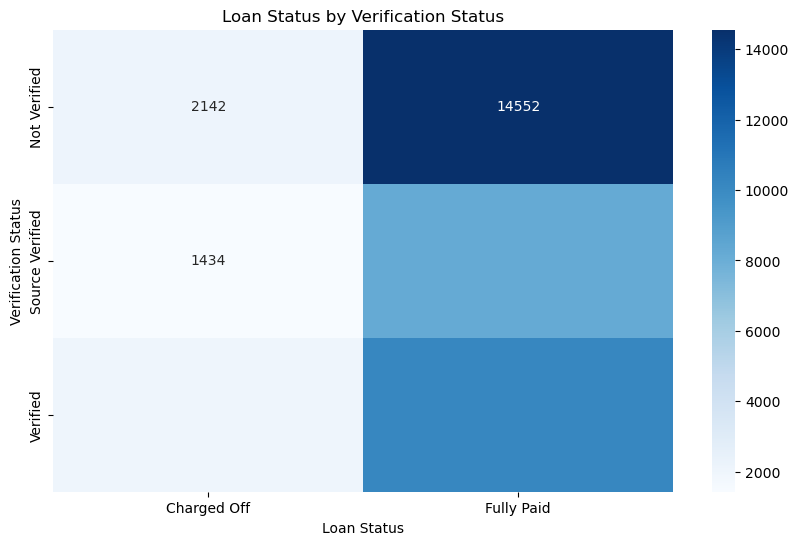

In [181]:
# Visualizing the relationship between two categorical variables (verification_status and loan_status) together
ct = pd.crosstab(loan_data['verification_status'], loan_data['loan_status'])

plt.figure(figsize=(10, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title('Loan Status by Verification Status')
plt.xlabel('Loan Status')
plt.ylabel('Verification Status')
plt.show()

In [55]:
# Conclusion from above graphs
# 1. Most of the loans were disburded to people whoes proper verification was not conducted.
# 2. Most of the loans are paid off , there are very few around 5000 which were charged off.
# 3. However , most of the non-verified loans are paid off hence the nature of loan re-payment is not dependent upon the verification status.

In [50]:
# -------------------------Creating derived columns-----------------------
# Creating month and year columns using 'issue_d' column
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y')
loan_data['issued_month'] = loan_data['issue_d'].dt.month
loan_data['issued_year'] = loan_data['issue_d'].dt.year

In [51]:
loan_data['issued_month'].value_counts()

issued_month
12    4215
11    4006
10    3761
9     3498
8     3388
7     3351
6     3180
5     2919
4     2831
3     2691
1     2379
2     2358
Name: count, dtype: int64

In [52]:
loan_data['issued_year'].value_counts()

issued_year
2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: count, dtype: int64

In [53]:
# Dropping 'issue_d' as not required 
loan_data = loan_data.drop(columns=['issue_d'])

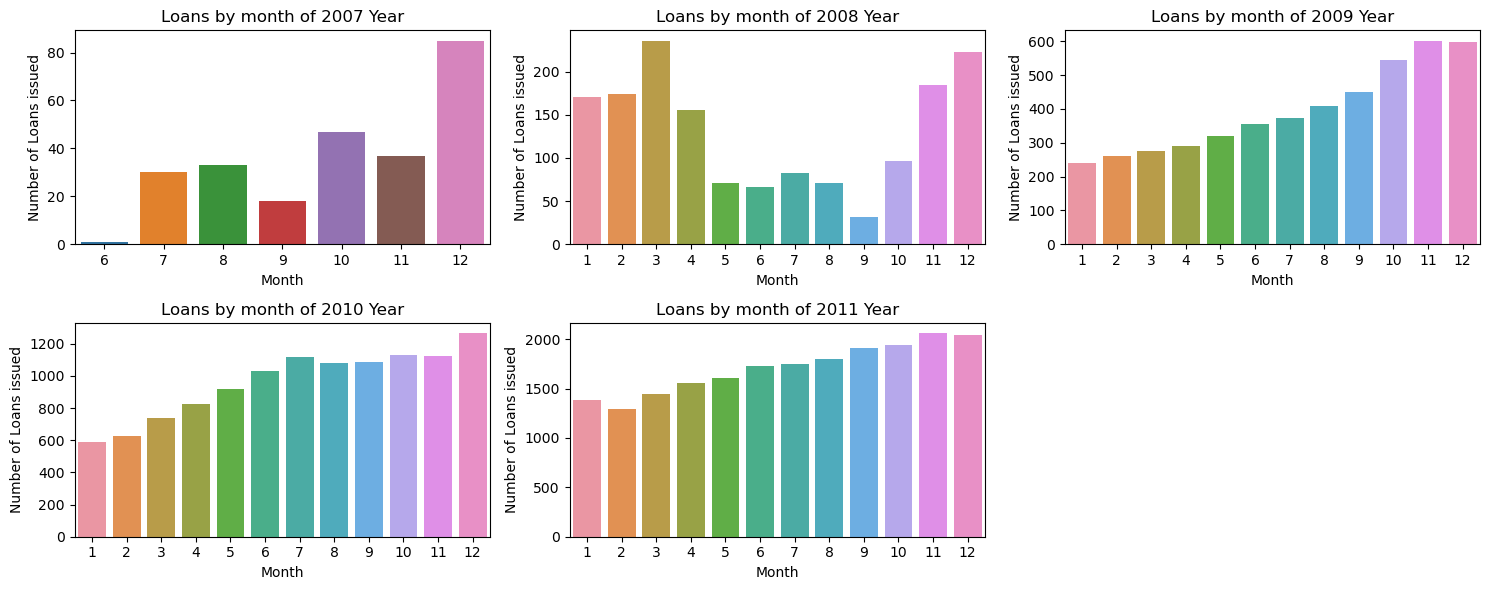

In [54]:
# Plotting the graph for number of loans issued on every month of each year
plt.figure(figsize=(15,6))

plt.subplot(2,3,1)
sns.countplot(x="issued_month", data=loan_data[loan_data['issued_year']==2007])
plt.title("Loans by month of 2007 Year")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(2,3,2)
sns.countplot( x="issued_month", data=loan_data[loan_data['issued_year']==2008])
plt.title("Loans by month of 2008 Year")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(2,3,3)
sns.countplot( x="issued_month", data=loan_data[loan_data['issued_year']==2009])
plt.title("Loans by month of 2009 Year")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(2,3,4)
sns.countplot( x="issued_month", data=loan_data[loan_data['issued_year']==2010])
plt.title("Loans by month of 2010 Year")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(2,3,5)
sns.countplot( x="issued_month", data=loan_data[loan_data['issued_year']==2011])
plt.title("Loans by month of 2011 Year")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.tight_layout()
plt.show()

In [61]:
# Conclusion from above graphs
# 1. Most of the loans were disbursed at the end of year in the months of October,November and December that is in the holiday season.
# 2. Number of loans disbursed have been increasing from 2007 to 2011 with slight drop in 2008.

In [55]:
"""valid_loan_data_for_analysis"""
v_loan_data = loan_data

In [56]:
loans_paid_data = v_loan_data[v_loan_data['loan_status'] == "Fully Paid"]

In [57]:
loans_defaulted_data = v_loan_data[v_loan_data['loan_status'] != "Fully Paid"]

In [58]:
loans_defaulted_data.shape

(5627, 30)

In [59]:
loans_paid_data.shape

(32950, 30)

In [60]:
loans_defaulted_data['loan_amnt'].describe()

count     5627.000000
mean     12104.385108
std       8085.732038
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [61]:
loans_paid_data['loan_amnt'].describe()

count    32950.000000
mean     10866.455994
std       7199.629493
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [62]:
len(v_loan_data[v_loan_data['loan_amnt'] < 900])

9

In [63]:
#Observation: People who took lower amounts of loan paid the loan without fail. loan < 900
# but the number of people taking loan below 900 is only 9 so cant draw any conclusion out of it.

In [64]:
#Analysing data between defaulted and paid customers there is no significance of dti, annual_inc, loan_amnt, int_rate

In [65]:
loans_paid_data['loan_amnt'].describe()

count    32950.000000
mean     10866.455994
std       7199.629493
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [66]:
test_df = loans_defaulted_data[ loans_defaulted_data['loan_amnt'] > 25000]
test_df['term'].value_counts()
#loans_defaulted_data['loan_amnt'].describe()
#loans_defaulted_data['term'].value_counts()
test_df1 = loans_paid_data[ loans_paid_data['loan_amnt'] > 15000]
test_df1['term'].value_counts()

term
 36 months    3914
 60 months    3090
Name: count, dtype: int64

In [67]:
loans_paid_data['delinq_2yrs'].value_counts()

delinq_2yrs
0     29450
1      2700
2       543
3       177
4        47
5        18
6         9
7         3
8         1
9         1
11        1
Name: count, dtype: int64

In [68]:
loans_defaulted_data['term'].value_counts()

term
 36 months    3227
 60 months    2400
Name: count, dtype: int64

In [69]:
loans_paid_data['term'].value_counts()

term
 36 months    25869
 60 months     7081
Name: count, dtype: int64

In [70]:
v_loan_data['term'].value_counts()

term
 36 months    29096
 60 months     9481
Name: count, dtype: int64

In [76]:
# People who opted for 5 year loan plan have aroud 25% defaulters compared to 10% defaulters for 3 year term loan

In [71]:
# For 'int_rate' removing % and changing the datatype to float
v_loan_data['int_rate'] = v_loan_data['int_rate'].str.rstrip('%').astype('float')

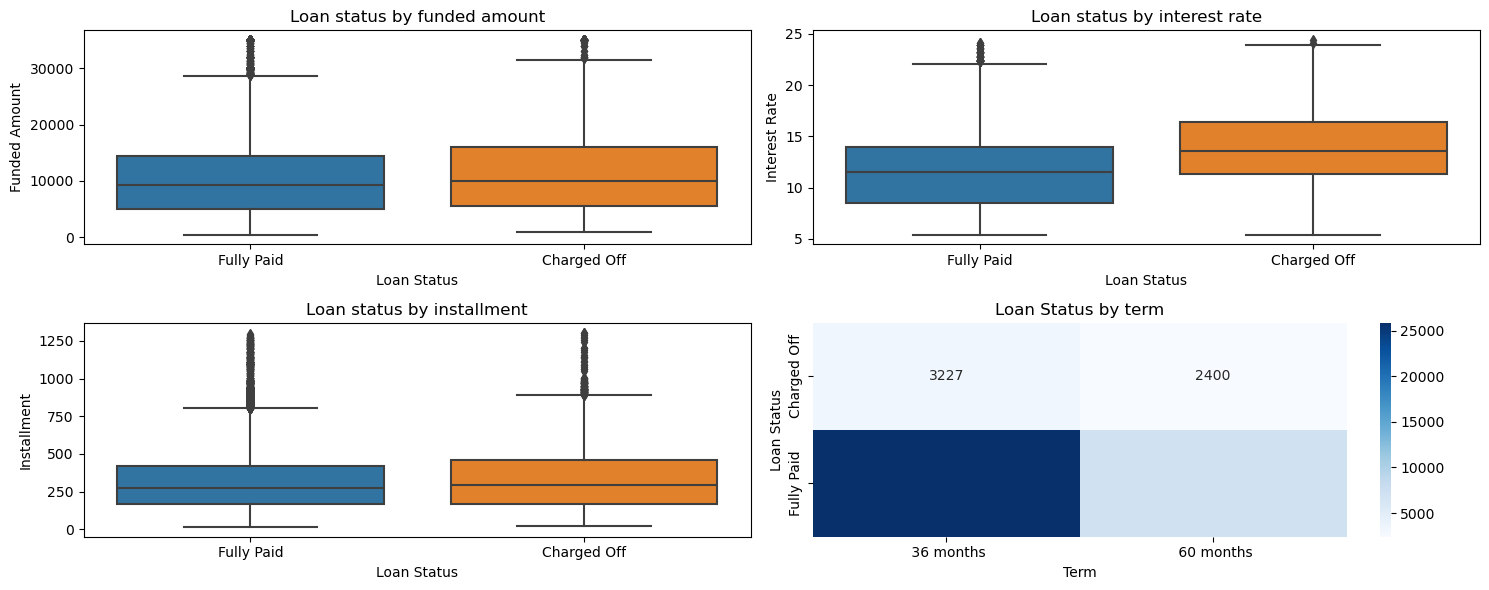

In [72]:
# Visualizing the relationship of loan_status with various other variables

plt.figure(figsize=(15, 6))

plt.subplot(2,2,1)
sns.boxplot(x="loan_status", y="funded_amnt" , data=v_loan_data)
plt.title("Loan status by funded amount")
plt.xlabel("Loan Status")
plt.ylabel("Funded Amount")

plt.subplot(2,2,2)
sns.boxplot(x="loan_status", y="int_rate" , data=v_loan_data)
plt.title("Loan status by interest rate")
plt.xlabel("Loan Status")
plt.ylabel("Interest Rate")

plt.subplot(2,2,3)
sns.boxplot(x="loan_status", y="installment" , data=v_loan_data)
plt.title("Loan status by installment")
plt.xlabel("Loan Status")
plt.ylabel("Installment")

plt.subplot(2,2,4)
ct = pd.crosstab(v_loan_data['loan_status'], v_loan_data['term'])
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title('Loan Status by term')
plt.xlabel('Term')
plt.ylabel('Loan Status')

plt.tight_layout()
plt.show()

In [ ]:
# Conclusion from above graphs
# 1. Loans that were charged off had higher funded amounts. This could indicate that higher-risk loans (larger amounts) were more likely to result in defaults or non-payment.
# 2. Loans that were charged off had higher interest rates. Higher interest rates often indicate riskier borrowers or riskier loan terms, which could contribute to a higher likelihood of default.
# 3. There was no significant impact observed based on installment amount. This suggests that the specific amount paid in installments did not strongly influence whether a loan was charged off or fully paid.
# 4. More loans with a term of 3 years (36 months) were charged off compared to loans with a term of 5 years (60 months). Shorter loan terms might indicate loans with higher monthly payments, potentially affecting borrower affordability and repayment capability.

In [73]:
test_data = v_loan_data[v_loan_data['total_rec_late_fee'] > 0]
print(v_loan_data.shape, test_data.shape)
#num of people who had paid late fees

(38577, 30) (1995, 30)


In [74]:
test_data = loans_defaulted_data[loans_defaulted_data['total_rec_late_fee'] > 0]
print(loans_defaulted_data.shape, test_data.shape)
#num of people who had paid late fee and defaulted


(5627, 30) (863, 30)


In [75]:
test_data = loans_paid_data[loans_paid_data['total_rec_late_fee'] > 0]
print(loans_paid_data.shape, test_data.shape)

(32950, 30) (1132, 30)


In [76]:
print("percentage of people who had history of late fee payments and defaulted:", 863/1995)

percentage of people who had history of late fee payments and defaulted: 0.43258145363408523


In [77]:
print("percentage of people who had no history of late fee payments and defaulted:", (5627-863)/(38577-1995))

percentage of people who had no history of late fee payments and defaulted: 0.13022798097424962


In [ ]:
#conclusion: People with history of late fee payments will have 43% of becoming defaulters.

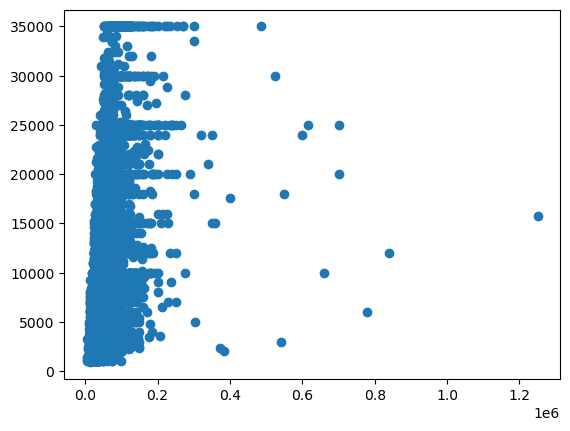

In [78]:


plt.scatter( loans_defaulted_data['annual_inc'], loans_defaulted_data['loan_amnt'])
plt.show()

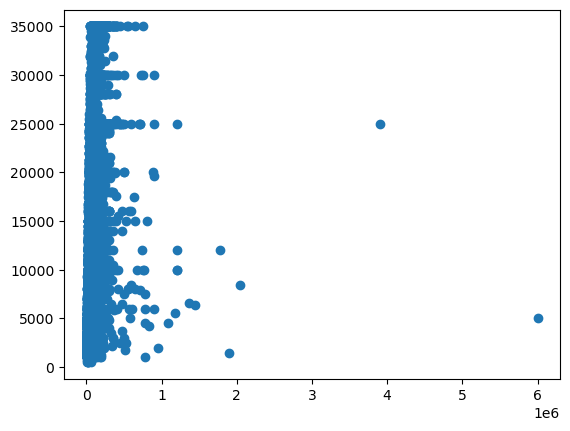

In [79]:
plt.scatter( loans_paid_data['annual_inc'], loans_paid_data['loan_amnt'])
plt.show()

In [80]:
loans_defaulted_data['annual_inc'].describe()


count    5.627000e+03
mean     6.242730e+04
std      4.777601e+04
min      4.080000e+03
25%      3.700000e+04
50%      5.300000e+04
75%      7.500000e+04
max      1.250000e+06
Name: annual_inc, dtype: float64

In [81]:
loans_defaulted_data['loan_amnt'].describe()

count     5627.000000
mean     12104.385108
std       8085.732038
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [286]:
v_loan_data['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [287]:
loans_paid_data['dti'].describe()

count    32950.000000
mean        13.148421
std          6.680041
min          0.000000
25%          7.980000
50%         13.200000
75%         18.390000
max         29.990000
Name: dti, dtype: float64

In [288]:
loans_defaulted_data['dti'].describe()

count    5627.000000
mean       14.000624
std         6.585577
min         0.000000
25%         9.050000
50%        14.290000
75%        19.290000
max        29.850000
Name: dti, dtype: float64

In [289]:
v_loan_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  loan_status          38577 non-null  object 
 12  purpose              38577 non-null  object 
 13  addr_state           38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  delinq_2yrs          38577 non-null  int6

In [82]:
v_loan_data['term'] = v_loan_data['term'].str.rstrip('months').astype('int')

In [83]:
test_data = v_loan_data
test_data['term'].head()

0    36
1    60
2    36
3    36
5    36
Name: term, dtype: int32

In [84]:
test_data1 = v_loan_data
/*
p = ROUND(test_data1['loan_amnt'])
r = test_data1['int_rate']/12
n = test_data1['term']  

test_data1['emi'] = p * r * ((1+r)**n)/((1+r)**n - 1)

SyntaxError: can't use starred expression here (3181588454.py, line 2)

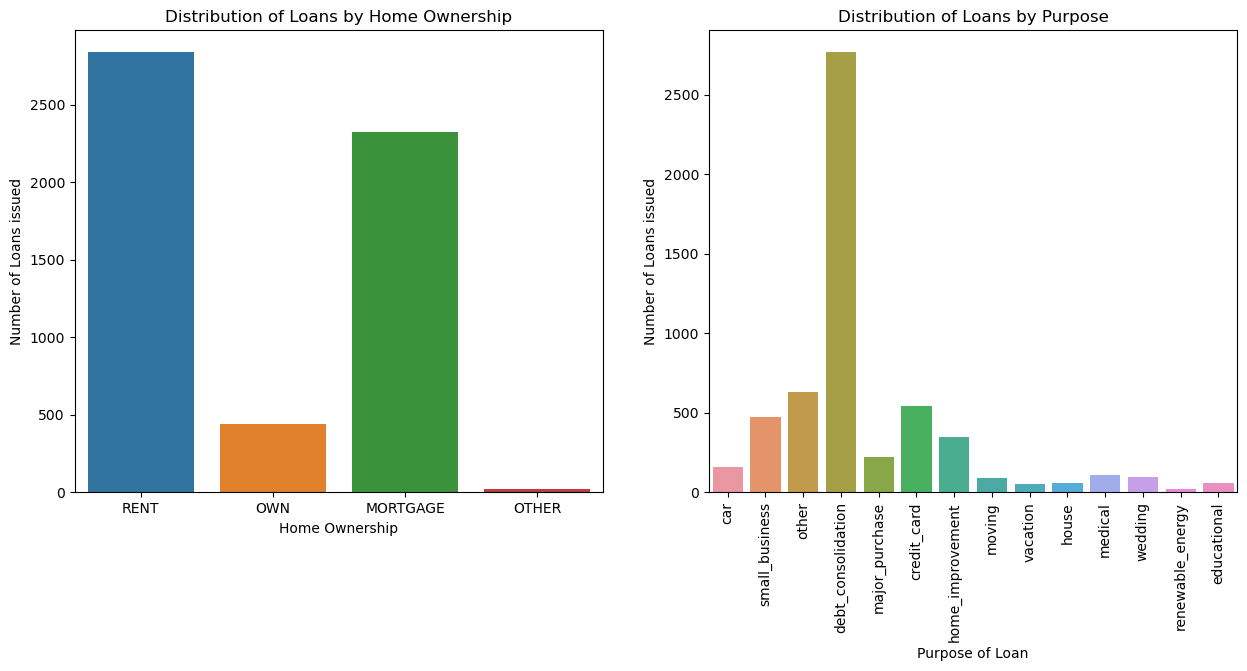

In [85]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot( x="home_ownership", data=loans_defaulted_data)
plt.title("Distribution of Loans by Home Ownership")
plt.xlabel("Home Ownership")
plt.ylabel("Number of Loans issued")

plt.subplot(1,2,2)
sns.countplot( x="purpose", data=loans_defaulted_data)
plt.title("Distribution of Loans by Purpose")
plt.xlabel("Purpose of Loan")
plt.ylabel("Number of Loans issued")

# To rotate axis text
plt.xticks(rotation=90)
plt.show()

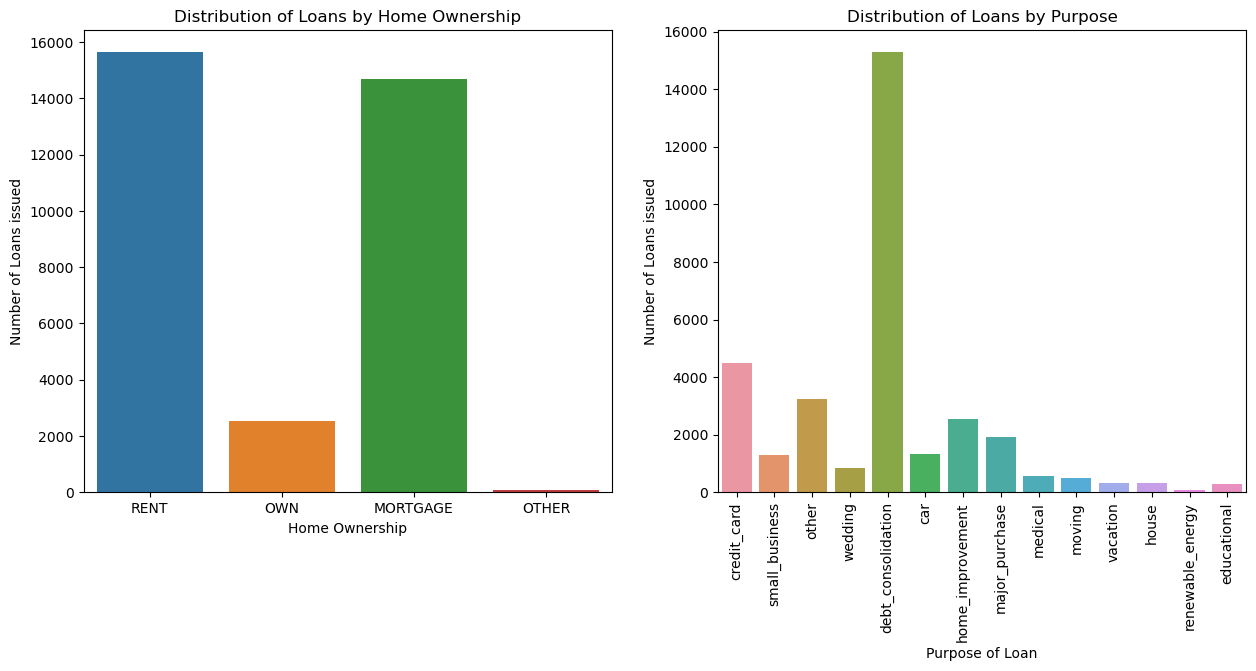

In [86]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot( x="home_ownership", data=loans_paid_data)
plt.title("Distribution of Loans by Home Ownership")
plt.xlabel("Home Ownership")
plt.ylabel("Number of Loans issued")

plt.subplot(1,2,2)
sns.countplot( x="purpose", data=loans_paid_data)
plt.title("Distribution of Loans by Purpose")
plt.xlabel("Purpose of Loan")
plt.ylabel("Number of Loans issued")

# To rotate axis text
plt.xticks(rotation=90)
plt.show()

In [95]:
loans_defaulted_data["purpose"].value_counts()/v_loan_data["purpose"].value_counts()

purpose
car                   0.106738
credit_card           0.107818
debt_consolidation    0.153254
educational           0.172308
home_improvement      0.120696
house                 0.160763
major_purchase        0.103256
medical               0.155653
moving                0.159722
other                 0.163777
renewable_energy      0.186275
small_business        0.270810
vacation              0.141333
wedding               0.103672
Name: count, dtype: float64

In [96]:
loans_paid_data["purpose"].value_counts()/v_loan_data["purpose"].value_counts()

purpose
car                   0.893262
credit_card           0.892182
debt_consolidation    0.846746
educational           0.827692
home_improvement      0.879304
house                 0.839237
major_purchase        0.896744
medical               0.844347
moving                0.840278
other                 0.836223
renewable_energy      0.813725
small_business        0.729190
vacation              0.858667
wedding               0.896328
Name: count, dtype: float64

In [ ]:
#conclusion: Loans given for small bussiness were most defaulted.. TODO: Need to analyze further

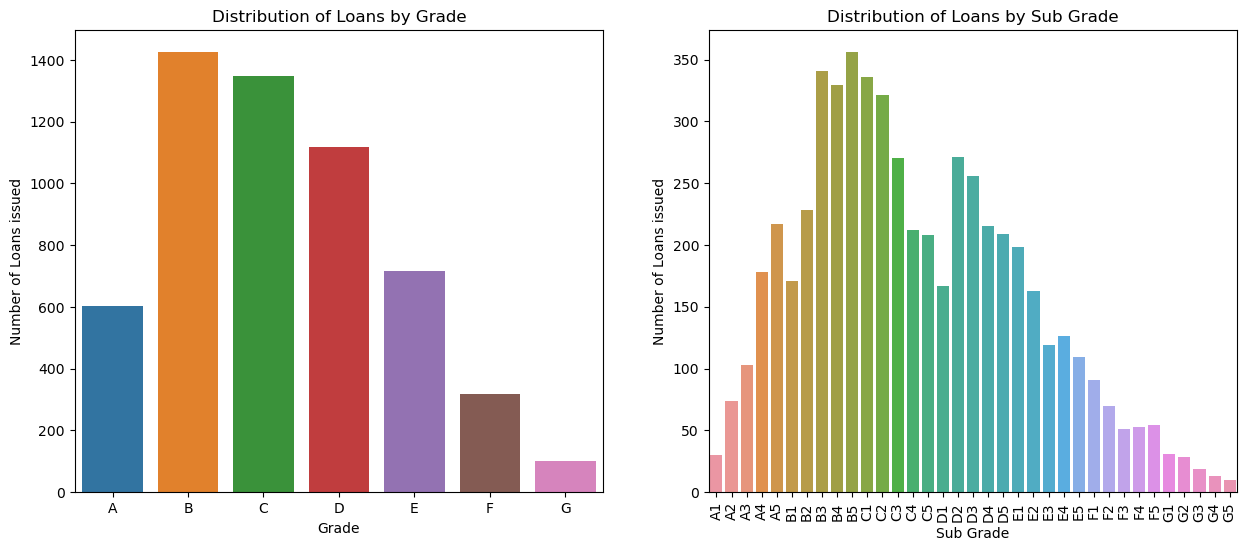

In [97]:
# Plotting graph by grade and sub_grades
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot( x="grade", data= loans_defaulted_data,order = np.sort(loans_defaulted_data['grade'].unique()))
plt.title("Distribution of Loans by Grade")
plt.xlabel("Grade")
plt.ylabel("Number of Loans issued")

plt.subplot(1,2,2)
sns.countplot( x="sub_grade", data=loans_defaulted_data, order = np.sort(loans_defaulted_data['sub_grade'].unique()))
plt.title("Distribution of Loans by Sub Grade")
plt.xlabel("Sub Grade")
plt.ylabel("Number of Loans issued")

# To rotate axis text
plt.xticks(rotation=90)
plt.show()

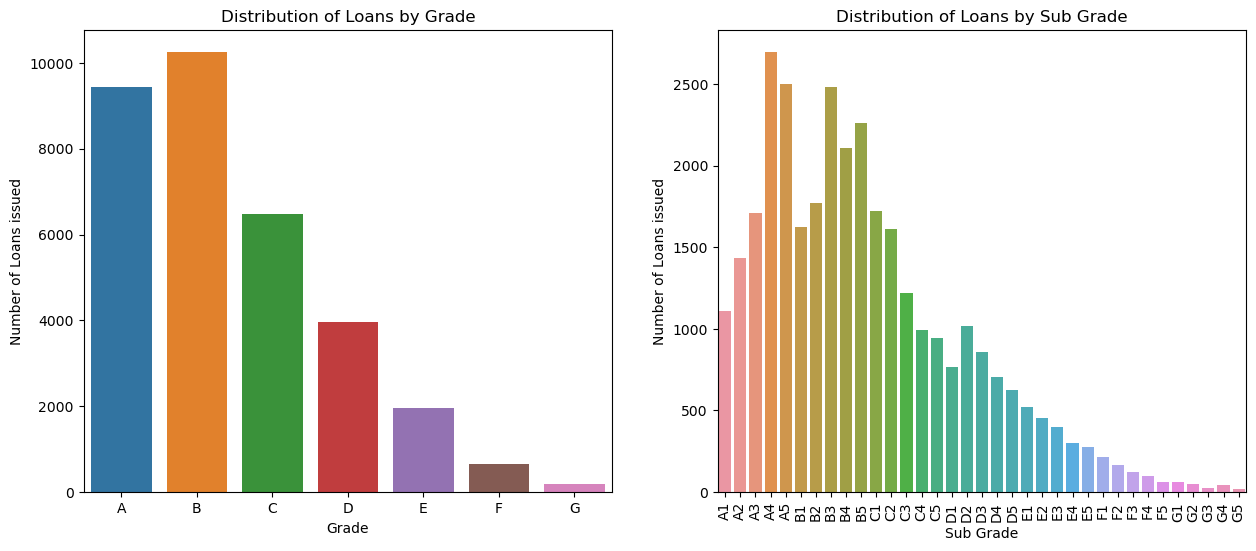

In [98]:
# Plotting graph by grade and sub_grades
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot( x="grade", data= loans_paid_data,order = np.sort(loans_paid_data['grade'].unique()))
plt.title("Distribution of Loans by Grade")
plt.xlabel("Grade")
plt.ylabel("Number of Loans issued")

plt.subplot(1,2,2)
sns.countplot( x="sub_grade", data=loans_paid_data, order = np.sort(loans_paid_data['sub_grade'].unique()))
plt.title("Distribution of Loans by Sub Grade")
plt.xlabel("Sub Grade")
plt.ylabel("Number of Loans issued")

# To rotate axis text
plt.xticks(rotation=90)
plt.show()

In [101]:
loans_defaulted_data["grade"].value_counts()/v_loan_data["grade"].value_counts()

grade
A    0.059930
B    0.122056
C    0.171943
D    0.219862
E    0.268494
F    0.326844
G    0.337793
Name: count, dtype: float64

In [102]:
loans_paid_data["grade"].value_counts()/v_loan_data["grade"].value_counts()

grade
B    0.877944
A    0.940070
C    0.828057
D    0.780138
E    0.731506
F    0.673156
G    0.662207
Name: count, dtype: float64

In [ ]:
#conclusion: G grade employees are most likely to be defaulters

In [122]:
loans_defaulted_data["sub_grade"].value_counts()/v_loan_data["sub_grade"].value_counts()

sub_grade
A1    0.026339
A2    0.049072
A3    0.056906
A4    0.061956
A5    0.079926
B1    0.095159
B2    0.113943
B3    0.120708
B4    0.135002
B5    0.136138
C1    0.163504
C2    0.166235
C3    0.181452
C4    0.175788
C5    0.180243
D1    0.179377
D2    0.210731
D3    0.229391
D4    0.234205
D5    0.250600
E1    0.274238
E2    0.265472
E3    0.230620
E4    0.297170
E5    0.281654
F1    0.298361
F2    0.300429
F3    0.293103
F4    0.350993
F5    0.477876
G1    0.329787
G2    0.363636
G3    0.422222
G4    0.240741
G5    0.344828
Name: count, dtype: float64

In [104]:
loans_paid_data["sub_grade"].value_counts()/v_loan_data["sub_grade"].value_counts()


sub_grade
A1    0.973661
A2    0.950928
A3    0.943094
A4    0.938044
A5    0.920074
B1    0.904841
B2    0.886057
B3    0.879292
B4    0.864998
B5    0.863862
C1    0.836496
C2    0.833765
C3    0.818548
C4    0.824212
C5    0.819757
D1    0.820623
D2    0.789269
D3    0.770609
D4    0.765795
D5    0.749400
E1    0.725762
E2    0.734528
E3    0.769380
E4    0.702830
E5    0.718346
F1    0.701639
F2    0.699571
F3    0.706897
F4    0.649007
F5    0.522124
G1    0.670213
G2    0.636364
G3    0.577778
G4    0.759259
G5    0.655172
Name: count, dtype: float64

In [123]:
#conclusion: F4,F5, G2,G3,G5 are more probable to be defaulters